In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import dataset
data = pd.read_csv("data/data_pca_question.csv", header=None)
print(data.head())

          0         1         2
0  2.363779 -6.420822 -0.364027
1  1.977516 -2.018005  3.978597
2  2.031534 -4.970056 -2.185831
3  1.604369 -4.398228 -6.081320
4  1.978524 -0.124124  9.031766


In [9]:
# calcular a média dos dados de cada feature
mean = np.mean(data, axis=0)
print("Mean:")
print(mean)

# para normalizar também devemos calcular os desvios padrões de cada features
std = np.std(data, axis=0)

data_norm = (data - mean)/std
print("Normalized data:")
print(data_norm.head())
# verificando se dados estão normalizados agora
# mean ~ 0, var = 1
# print("Mean: " + str(np.mean(data_norm, axis=0)))
# print("Var: " + str(np.var(data_norm, axis=0)))

Mean:
0    2.523896
1   -2.812758
2    0.303879
dtype: float64
Normalized data:
          0         1         2
0 -0.113705 -0.670764 -0.071320
1 -0.388004  0.147750  0.392392
2 -0.349644 -0.401056 -0.265855
3 -0.652988 -0.294750 -0.681822
4 -0.387288  0.499835  0.931978


In [10]:
# calcular a matriz de covariância dos dados
# é necessário fazer a matriz transposta dos dados normalizados 
# antes de fazer a covariancia
cov = np.cov(data_norm.T)
print("Cov: ")
print(cov)

autovalores, autovetores = np.linalg.eig(cov)
print("Autovalores: ")
print(autovalores)
print("Autovetores: ")
print(autovetores)

Cov: 
[[ 1.001001   -0.53439232 -0.60672834]
 [-0.53439232  1.001001    0.94108144]
 [-0.60672834  0.94108144  1.001001  ]]
Autovalores: 
[2.40588855 0.541553   0.05556146]
Autovetores: 
[[ 0.49831409 -0.86283557  0.08484009]
 [-0.60532847 -0.41630393 -0.6784309 ]
 [-0.62069357 -0.28671556  0.72974905]]


In [11]:
# para decidir sobre a reducao da dimensionalidade é necessário ver a representação
# da variabilidade através dos maiores autovalores
autovalores_ord = np.sort(autovalores)[::-1] # ordem descendente
# print(autovalores_ord)

total = np.sum(autovalores_ord)

# reducao para 1D
red = autovalores_ord[0] / total
print("1D: " + str(round(red*100,2)) + '% da variabilidade mantida')

# reducao para 2D
red = (autovalores_ord[0]+autovalores_ord[1]) / total
print("2D: " + str(round(red*100,2)) + '% da variabilidade mantida')

1D: 80.12% da variabilidade mantida
2D: 98.15% da variabilidade mantida


In [12]:
# reconstrucao dos dados nas componentes principais (autovetores) de maiores autovalores
autovetores_2d = autovetores[:, :2] # selecionar todas as linhas das 2 primeiras colunas
# print(autovetores_2d)

autovetores_1d = autovetores[:, :1] # selecionar todas as linhas da primeira coluna
# print(autovetores_1d)

# apos selecionar os autovetores das componentes principais podemos projetar os dados
data_2d = np.dot(data_norm, autovetores_2d)
data_1d = np.dot(data_norm, autovetores_1d)

# reconstrucao dos dados
data_recon_2d = np.dot(data_2d, autovetores_2d.T)
print(data_norm.head())   # apenas comparando os dados
print(data_recon_2d[:5])
data_recon_1d = np.dot(data_1d, autovetores_1d.T)
print(data_recon_1d[:5])


          0         1         2
0 -0.113705 -0.670764 -0.071320
1 -0.388004  0.147750  0.392392
2 -0.349644 -0.401056 -0.265855
3 -0.652988 -0.294750 -0.681822
4 -0.387288  0.499835  0.931978
[[-0.14707901 -0.40388638 -0.35838458]
 [-0.40100051  0.25167987  0.280601  ]
 [-0.35375129 -0.36820833 -0.30118795]
 [-0.62304019 -0.53422975 -0.42422691]
 [-0.4134313   0.70889285  0.70710659]]
[[ 0.19615605 -0.23828113 -0.24432944]
 [-0.26228286  0.31860885  0.32669612]
 [ 0.11638283 -0.14137638 -0.14496495]
 [ 0.13764914 -0.16720969 -0.17145399]
 [-0.53520338  0.65013983  0.66664239]]


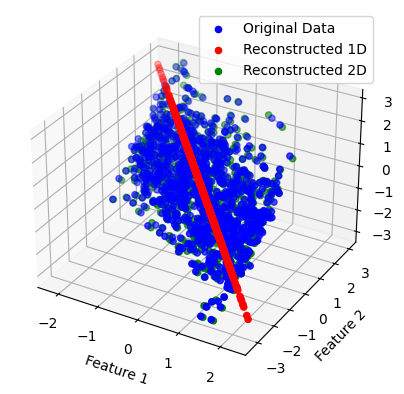

In [13]:
# plotar os dados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# dados originais normalizados para ficar na mesma escala
ax.scatter(data_norm.iloc[:, 0], data_norm.iloc[:, 1], data_norm.iloc[:, 2], c='b', label='Original Data')

# Dados reconstruídos a partir da projeção 1D
ax.scatter(data_recon_1d[:, 0], data_recon_1d[:, 1], data_recon_1d[:, 2], c='r', label='Reconstructed 1D')

# Dados reconstruídos a partir da projeção 2D
ax.scatter(data_recon_2d[:, 0], data_recon_2d[:, 1], data_recon_2d[:, 2], c='g', label='Reconstructed 2D')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()